In [1]:
import pandas as pd
import requests
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [4]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3263 entries, 0 to 3262
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        3263 non-null   int64 
 1   keyword   3237 non-null   object
 2   location  2158 non-null   object
 3   text      3263 non-null   object
dtypes: int64(1), object(3)
memory usage: 102.1+ KB


In [5]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [6]:
tokenizer = Tokenizer(num_words = 100, oov_token="<OOV>")

In [7]:
tokenizer.fit_on_texts(data['text'])

In [8]:
train_x = pad_sequences(tokenizer.texts_to_sequences(data['text']),padding='pre', maxlen=100)
print(data['text'])

0       Our Deeds are the Reason of this #earthquake M...
1                  Forest fire near La Ronge Sask. Canada
2       All residents asked to 'shelter in place' are ...
3       13,000 people receive #wildfires evacuation or...
4       Just got sent this photo from Ruby #Alaska as ...
                              ...                        
7608    Two giant cranes holding a bridge collapse int...
7609    @aria_ahrary @TheTawniest The out of control w...
7610    M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...
7611    Police investigating after an e-bike collided ...
7612    The Latest: More Homes Razed by Northern Calif...
Name: text, Length: 7613, dtype: object


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [10]:
tokenizer1 = Tokenizer(num_words = 100, oov_token="<OOV>")

In [11]:
train_y=data['target']

In [12]:
data=data.drop(['target','location','keyword','id'], axis=1)

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    7613 non-null   object
dtypes: object(1)
memory usage: 59.6+ KB


In [14]:
test1=test['text']

In [15]:
test1.shape

(3263,)

In [16]:
data['text']

0       Our Deeds are the Reason of this #earthquake M...
1                  Forest fire near La Ronge Sask. Canada
2       All residents asked to 'shelter in place' are ...
3       13,000 people receive #wildfires evacuation or...
4       Just got sent this photo from Ruby #Alaska as ...
                              ...                        
7608    Two giant cranes holding a bridge collapse int...
7609    @aria_ahrary @TheTawniest The out of control w...
7610    M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...
7611    Police investigating after an e-bike collided ...
7612    The Latest: More Homes Razed by Northern Calif...
Name: text, Length: 7613, dtype: object

In [17]:
train_x

array([[ 0,  0,  0, ...,  1, 90, 41],
       [ 0,  0,  0, ...,  1,  1,  1],
       [ 0,  0,  0, ...,  1, 25,  1],
       ...,
       [ 0,  0,  0, ...,  2,  3,  1],
       [ 0,  0,  0, ...,  1,  1,  1],
       [ 0,  0,  0, ...,  2,  3,  1]], dtype=int32)

In [18]:

tokenizer1.fit_on_texts(test1)
test1=train_sequences = pad_sequences(tokenizer.texts_to_sequences(test1),padding='pre', maxlen=100)


In [19]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(1000, 16, input_length=100),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64,return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

2022-01-25 10:44:44.721268: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [20]:
hostory=model.fit(train_x,train_y,epochs=50)

Epoch 1/50
238/238 [==============================] - 24s 75ms/step - loss: 0.6320 - accuracy: 0.6396
Epoch 2/50
238/238 [==============================] - 18s 76ms/step - loss: 0.5783 - accuracy: 0.7046
Epoch 3/50
238/238 [==============================] - 18s 77ms/step - loss: 0.5611 - accuracy: 0.7180
Epoch 4/50
238/238 [==============================] - 27s 113ms/step - loss: 0.5582 - accuracy: 0.7155
Epoch 5/50
238/238 [==============================] - 20s 83ms/step - loss: 0.5513 - accuracy: 0.7227
Epoch 6/50
238/238 [==============================] - 20s 86ms/step - loss: 0.5457 - accuracy: 0.7284
Epoch 7/50
238/238 [==============================] - 20s 85ms/step - loss: 0.5455 - accuracy: 0.7295
Epoch 8/50
238/238 [==============================] - 21s 86ms/step - loss: 0.5449 - accuracy: 0.7318
Epoch 9/50
238/238 [==============================] - 21s 87ms/step - loss: 0.5422 - accuracy: 0.7318
Epoch 10/50
238/238 [==============================] - 20s 84ms/step - loss: 0.53

KeyError: 'val_accuracy'

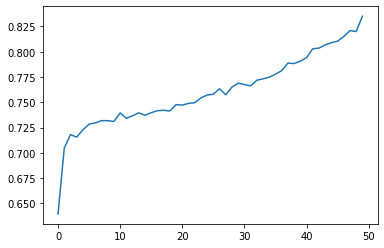

In [23]:
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
plot_graphs(hostory, 'accuracy')

KeyError: 'val_loss'

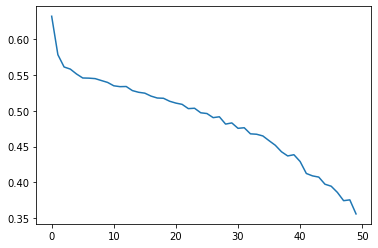

In [24]:
plot_graphs(hostory, 'loss')

In [25]:
pred=model.predict(test1)



In [26]:
final=[]
for i in range(len(pred)):
    if pred[i] >=0.5:
        final.append(1)
    else:
        final.append(0)
print(final)


[1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 

In [28]:
final=np.array(final)

In [29]:
final.shape

(3263,)

In [30]:
final_data={'id':test['id'],'target':final}
submis=pd.DataFrame(data=final_data)

submis.to_csv('submission_3.csv' , index=False)
